In [23]:
"""
SESIÓN 9: VISUALIZACIÓN BÁSICA DE DATOS DE POZOS
Laboratorio 1: Visualización de Series Temporales de Producción

OBJETIVO:
Crear visualizaciones efectivas de series temporales para análisis
de tendencias de producción y comunicación de resultados.

CONTEXTO EMPRESARIAL:
Como analista en Meridian Consulting, necesitas generar visualizaciones
que comuniquen claramente las tendencias de producción a los directivos
de las empresas petroleras clientes.

DATOS DISPONIBLES:
- produccion_historica.csv: Datos diarios de producción de 5 pozos
"""

import pandas as pd
import matplotlib.pyplot as plt
import os

print("=== LABORATORIO 1: SERIES TEMPORALES DE PRODUCCIÓN ===")
print()

# Configuración inicial
plt.style.use('seaborn-v0_8-whitegrid')
ruta_datos = os.path.join(os.path.dirname('produccion_historica.csv'), '..', 'datos', 'produccion_historica.csv')

# PARTE 1: CARGA Y PREPARACIÓN DE DATOS
print("PARTE 1: Carga y preparación de datos")
print("-" * 50)

# TODO: Cargar el archivo CSV y convertir la columna 'fecha' a datetime
df = pd.read_csv('datos/produccion_historica.csv')  # Reemplazar con tu código
df['fecha'] = pd.to_datetime(df['fecha'])  # Convertir a datetime   


# TODO: Mostrar información básica del dataset
# - Número de registros
print(f"Número de registros: {len(df)}")
# - Columnas
print("\nInformación del dataset:")
print(f"Número de registros: {len(df)}")
print(f"Columnas: {df.columns.tolist()}")   
# - Pozos únicos
print(f"Pozos únicos: {df['pozo'].unique()}")      
# - Rango de fechas
print(f"Rango de fechas: {df['fecha'].min()} a {df['fecha'].max()}")
# - Primeras 5 filas
print("\nPrimeras 5 filas del dataset:")
print(df.head())    

print("\n" + "="*50 + "\n")

=== LABORATORIO 1: SERIES TEMPORALES DE PRODUCCIÓN ===

PARTE 1: Carga y preparación de datos
--------------------------------------------------
Número de registros: 75

Información del dataset:
Número de registros: 75
Columnas: ['fecha', 'pozo', 'barriles_diarios', 'presion_psi', 'temperatura_f', 'api_gravity']
Pozos únicos: ['POZO-A-001' 'POZO-A-002' 'POZO-B-001' 'POZO-B-002' 'POZO-C-001']
Rango de fechas: 2024-01-01 00:00:00 a 2024-01-15 00:00:00

Primeras 5 filas del dataset:
       fecha        pozo  barriles_diarios  presion_psi  temperatura_f  \
0 2024-01-01  POZO-A-001              1250         2850            185   
1 2024-01-01  POZO-A-002               980         2720            182   
2 2024-01-01  POZO-B-001              1580         3100            190   
3 2024-01-01  POZO-B-002               850         2650            178   
4 2024-01-01  POZO-C-001              1100         2900            186   

   api_gravity  
0         32.5  
1         31.8  
2         33.2  
3 

PARTE 2: Serie temporal de un pozo individual
--------------------------------------------------


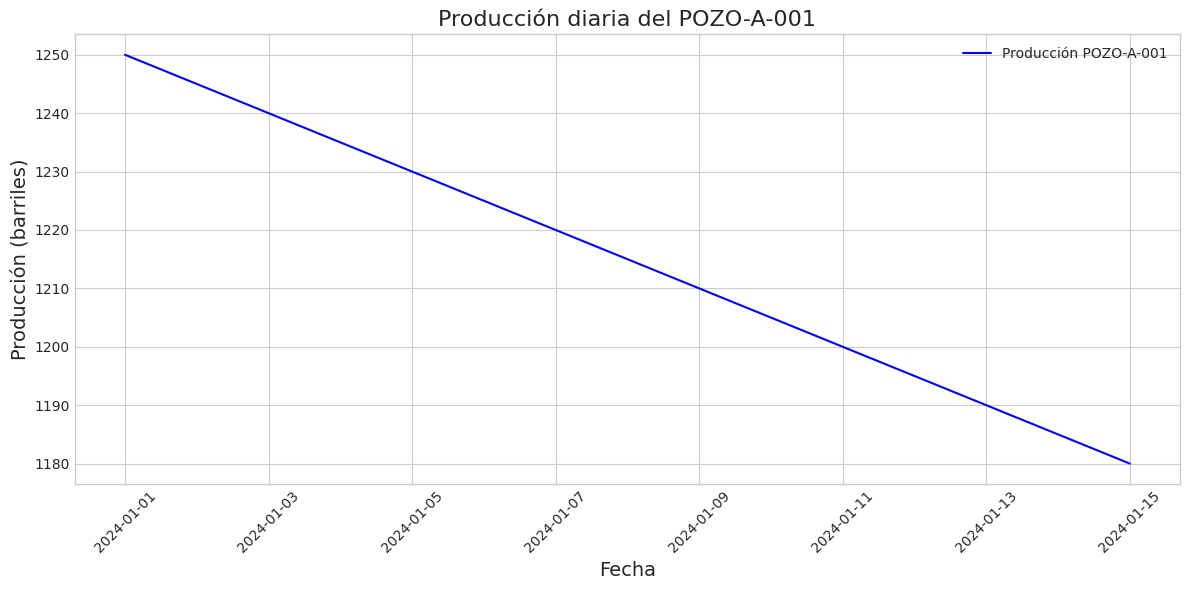

In [24]:
# PARTE 2: VISUALIZACIÓN BÁSICA DE SERIE TEMPORAL
print("PARTE 2: Serie temporal de un pozo individual")
print("-" * 50)

# TODO: Crear un gráfico de línea mostrando la producción del POZO-A-001
# Requisitos:
# - Tamaño de figura: 12x6
plt.figure(figsize=(12, 6))

# - Gráfico de línea con fecha en el eje X y producción en el eje Y
pozo_a = df[df['pozo'] == 'POZO-A-001']
plt.plot(pozo_a['fecha'], pozo_a['barriles_diarios'], label='Producción POZO-A-001', color='blue')

# - Título descriptivo
plt.title('Producción diaria del POZO-A-001', fontsize=16)

# - Etiquetas en los ejes
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Producción (barriles)', fontsize=14)    
# - Grid activado
plt.grid(True)  
# - Formato de fecha legible en el eje X
plt.xticks(rotation=45)
# - Leyenda
plt.legend()    
# - Mostrar el gráfico
plt.tight_layout()
plt.show()      
print("\n" + "="*50 + "\n") 


PARTE 3: Comparación de producción entre pozos
--------------------------------------------------


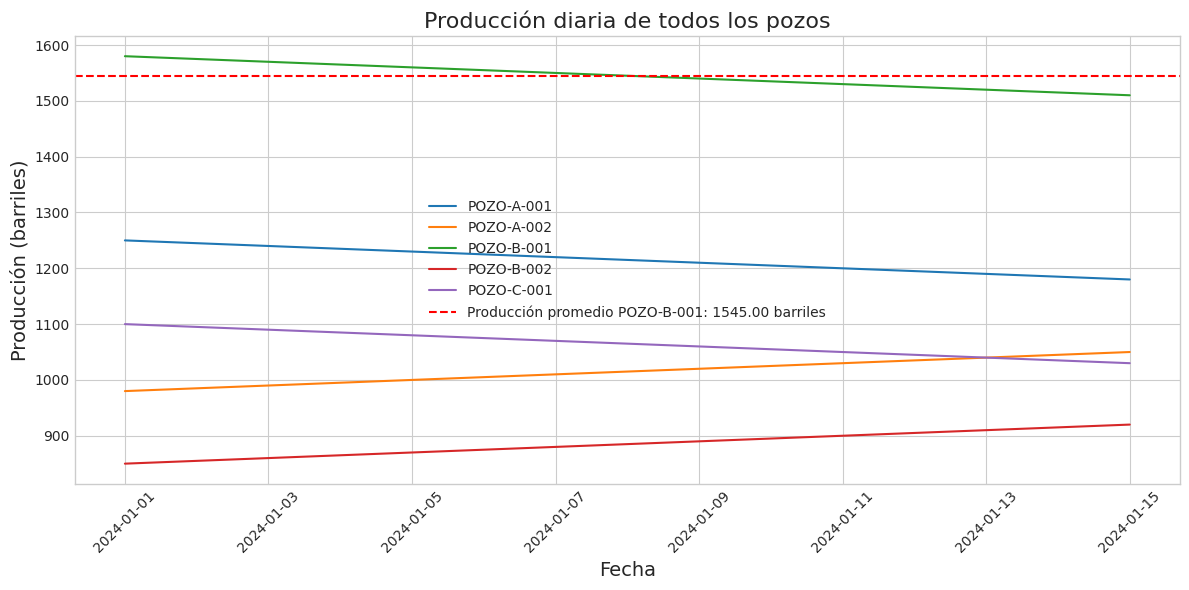

In [25]:
# PARTE 3: COMPARACIÓN DE MÚLTIPLES POZOS
print("PARTE 3: Comparación de producción entre pozos")
print("-" * 50)

# TODO: Crear un gráfico comparando la producción de todos los pozos
# Requisitos:
# - Todos los pozos en el mismo gráfico
plt.figure(figsize=(12, 6)) 
# - Diferentes colores para cada pozo
for pozo in df['pozo'].unique():
    pozo_data = df[df['pozo'] == pozo]
    plt.plot(pozo_data['fecha'], pozo_data['barriles_diarios'], label=pozo)
# - Leyenda clara
plt.title('Producción diaria de todos los pozos', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Producción (barriles)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Pozos')
plt.tight_layout()
# - Destacar el pozo con mayor producción promedio
produccion_promedio = df.groupby('pozo')['barriles_diarios'].mean()
pozo_mayor_produccion = produccion_promedio.idxmax()
plt.axhline(y=produccion_promedio.max(), color='red', linestyle='--', label=f'Producción promedio {pozo_mayor_produccion}: {produccion_promedio.max():.2f} barriles')
plt.legend()
plt.show()
print("\n" + "="*50 + "\n")


PARTE 4: Análisis de tendencias con media móvil
--------------------------------------------------


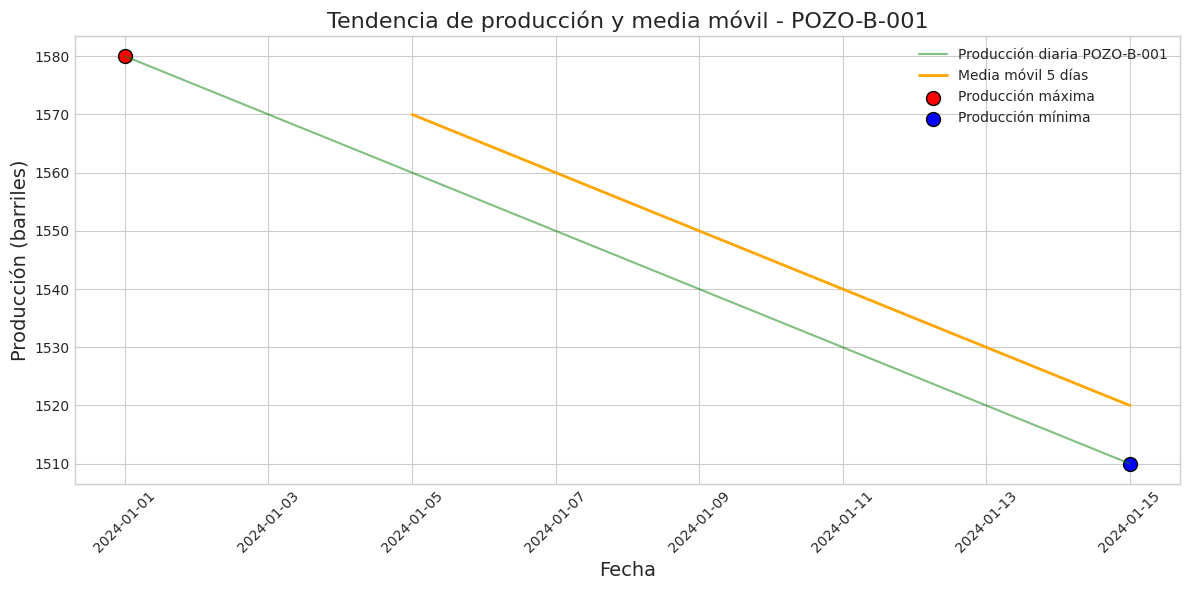

In [26]:
# PARTE 4: ANÁLISIS DE TENDENCIAS
print("PARTE 4: Análisis de tendencias con media móvil")
print("-" * 50)

# TODO: Para el POZO-B-001:
# 1. Graficar la producción diaria (línea delgada, con transparencia)
pozo_b = df[df['pozo'] == 'POZO-B-001']
plt.figure(figsize=(12, 6))
plt.plot(pozo_b['fecha'], pozo_b['barriles_diarios'], label='Producción diaria POZO-B-001', color='green', alpha=0.5)
# 2. Calcular y graficar la media móvil de 5 días (línea gruesa)
media_movil = pozo_b['barriles_diarios'].rolling(window=5).mean()
plt.plot(pozo_b['fecha'], media_movil, label='Media móvil 5 días', color='orange', linewidth=2) 
# 3. Identificar y marcar el punto de producción máxima
punto_maximo = pozo_b.loc[pozo_b['barriles_diarios'].idxmax()]
plt.scatter(punto_maximo['fecha'], punto_maximo['barriles_diarios'],
            color='red', s=100, label='Producción máxima', edgecolor='black')
# 4. Identificar y marcar el punto de producción mínima
punto_minimo = pozo_b.loc[pozo_b['barriles_diarios'].idxmin()]
plt.scatter(punto_minimo['fecha'], punto_minimo['barriles_diarios'],
            color='blue', s=100, label='Producción mínima', edgecolor='black')
# Mejoras visuales
plt.title('Tendencia de producción y media móvil - POZO-B-001', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Producción (barriles)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

PARTE 5: Dashboard integrado de producción
--------------------------------------------------


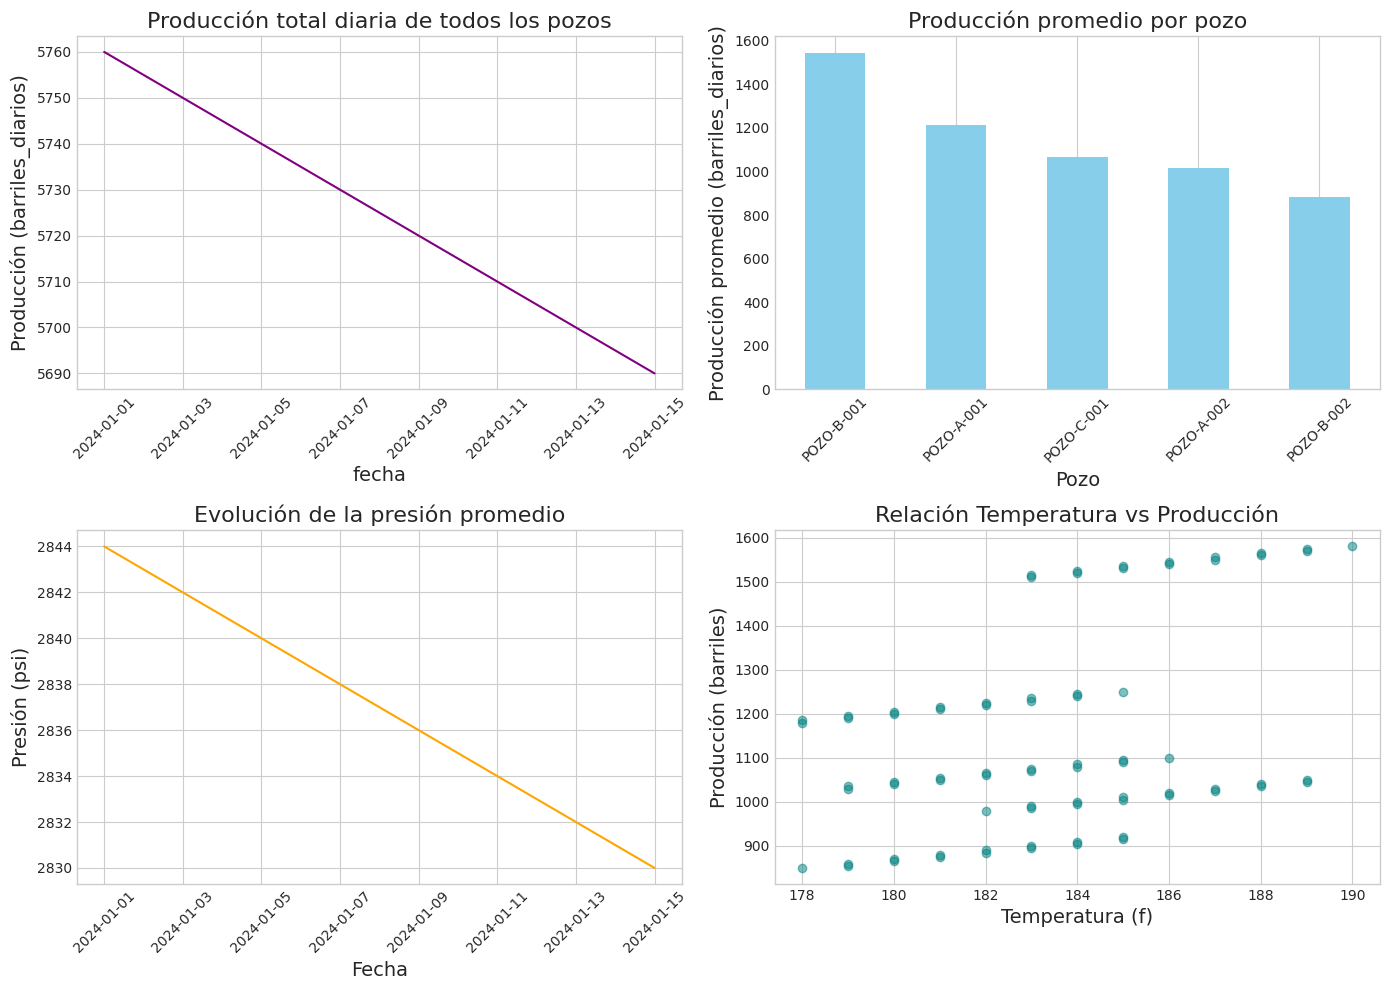

In [27]:
# PARTE 5: DASHBOARD DE PRODUCCIÓN
print("PARTE 5: Dashboard integrado de producción")
print("-" * 50)

# TODO: Crear un dashboard con 4 subplots:
# 1. Superior izquierda: Producción total diaria (suma de todos los pozos)
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
produccion_total = df.groupby('fecha')['barriles_diarios'].sum()
plt.plot(produccion_total.index, produccion_total.values, label='Producción total diaria', color='purple')
plt.title('Producción total diaria de todos los pozos', fontsize=16)
plt.xlabel('fecha', fontsize=14)
plt.ylabel('Producción (barriles_diarios)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45) 
# 2. Superior derecha: Producción promedio por pozo (gráfico de barras)
plt.subplot(2, 2, 2)
produccion_promedio = df.groupby('pozo')['barriles_diarios'].mean().sort_values(ascending=False)
produccion_promedio.plot(kind='bar', color='skyblue')
plt.title('Producción promedio por pozo', fontsize=16)
plt.xlabel('Pozo', fontsize=14)
plt.ylabel('Producción promedio (barriles_diarios)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')      
# 3. Inferior izquierda: Evolución de la presión promedio
plt.subplot(2, 2, 3)
presion_promedio = df.groupby('fecha')['presion_psi'].mean()
plt.plot(presion_promedio.index, presion_promedio.values, label='Presión promedio', color='orange')
plt.title('Evolución de la presión promedio', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Presión (psi)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)     
# 4. Inferior derecha: Relación temperatura vs producción (scatter plot)
plt.subplot(2, 2, 4)
plt.scatter(df['temperatura_f'], df['barriles_diarios'], alpha=0.5, color='teal')
plt.title('Relación Temperatura vs Producción', fontsize=16)
plt.xlabel('Temperatura (f)', fontsize=14)
plt.ylabel('Producción (barriles)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()  


PARTE 6: Gráfico profesional para reporte
--------------------------------------------------


/tmp/ipykernel_50634/4046314494.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proyeccion = produccion_acumulada[-1] + (produccion_acumulada[-1] - produccion_acumulada[-5]) * pd.Series(range(1, 6))
/tmp/ipykernel_50634/4046314494.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proyeccion = produccion_acumulada[-1] + (produccion_acumulada[-1] - produccion_acumulada[-5]) * pd.Series(range(1, 6))
/tmp/ipykernel_50634/4046314494.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

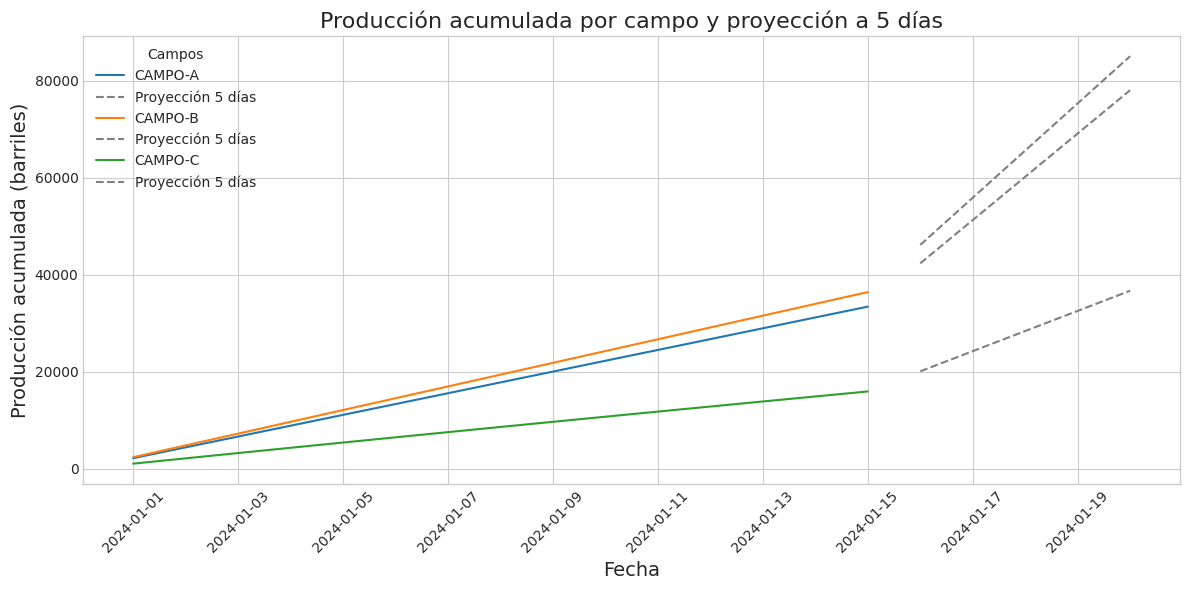

In [30]:
# PARTE 6: VISUALIZACIÓN PARA REPORTE EJECUTIVO
print("PARTE 6: Gráfico profesional para reporte")
print("-" * 50)

# TODO: Crear una visualización profesional que muestre:
# 1. Producción acumulada por campo (CAMPO-A, CAMPO-B, CAMPO-C)
# - Cargar datos de campos
campos = {
    'CAMPO-A': df[df['pozo'].str.startswith('POZO-A')],
    'CAMPO-B': df[df['pozo'].str.startswith('POZO-B')],
    'CAMPO-C': df[df['pozo'].str.startswith('POZO-C')]
}

# 2. Añadir anotaciones para eventos importantes
plt.figure(figsize=(12, 6))
for campo, datos in campos.items():
    produccion_acumulada = datos.groupby('fecha')['barriles_diarios'].sum().cumsum()
    plt.plot(produccion_acumulada.index, produccion_acumulada.values, label=campo)  

# 3. Incluir proyección para los próximos 5 días (línea punteada)
    proyeccion = produccion_acumulada[-1] + (produccion_acumulada[-1] - produccion_acumulada[-5]) * pd.Series(range(1, 6))
    fechas_proyeccion = pd.date_range(start=produccion_acumulada.index[-1] + pd.Timedelta(days=1), periods=5)
    plt.plot(fechas_proyeccion, proyeccion, linestyle='--', color='gray', label='Proyección 5 días')        


# 4. Formato profesional con colores corporativos
plt.title('Producción acumulada por campo y proyección a 5 días', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Producción acumulada (barriles)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Campos')
plt.tight_layout()  

# 5. Guardar en alta resolución (300 DPI)
plt.savefig('produccion_acumulada_por_campo.png', dpi=300)
plt.show()      
print("\n" + "="*50 + "\n") 

          


DESAFÍO: Análisis de eficiencia de producción
--------------------------------------------------


AttributeError: 'Index' object has no attribute 'strftime'

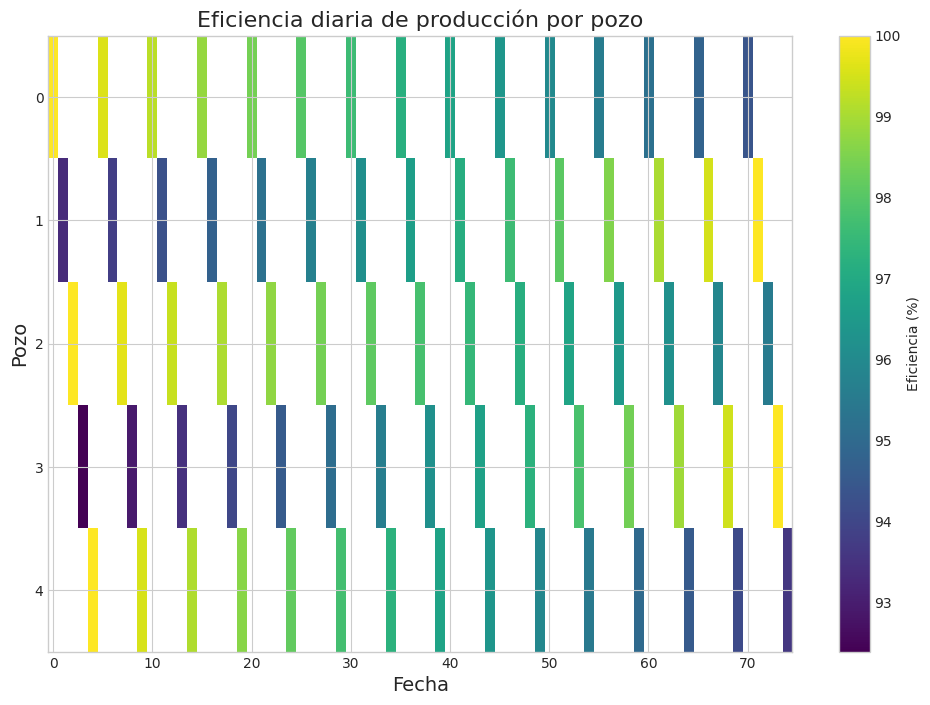

In [34]:
# DESAFÍO ADICIONAL
print("DESAFÍO: Análisis de eficiencia de producción")
print("-" * 50)

# TODO: Crear una visualización que muestre:
# 1. Calcular la eficiencia como: (producción actual / producción máxima del pozo) * 100
eficiencia = df.groupby('pozo')['barriles_diarios'].apply(lambda x: (x / x.max()) * 100).reset_index()
eficiencia.columns = ['pozo', 'fecha' , 'eficiencia_diaria']              
# 2. Crear un heatmap mostrando la eficiencia diaria de cada pozo
eficiencia_pivot = eficiencia.pivot(index='pozo', columns='fecha', values='eficiencia_diaria')
plt.figure(figsize=(12, 8))
plt.imshow(eficiencia_pivot, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Eficiencia (%)')
plt.title('Eficiencia diaria de producción por pozo', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Pozo', fontsize=14)
plt.xticks(ticks=range(len(eficiencia_pivot.columns)), labels=eficiencia_pivot.columns.strftime('%Y-%m-%d'), rotation=45)
plt.yticks(ticks=range(len(eficiencia_pivot.index)), labels=eficiencia_pivot.index)
plt.tight_layout()
plt.show()      
# 3. Identificar patrones de baja eficiencia
baja_eficiencia = eficiencia[eficiencia['eficiencia_diaria'] < 50]
print("Días con baja eficiencia (menos del 50%):")
print(baja_eficiencia)      
# 4. Proponer mejoras basadas en los patrones observados
print("Propuestas de mejora:")
print("- Optimizar procesos de extracción en días de baja eficiencia.")
print("- Implementar mantenimiento preventivo en pozos con baja eficiencia recurrente.")            